## waste management using cnn model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

In [7]:
train_path ='dataset/TRAIN'
test_path= 'dataset/TEST'

In [8]:
#importing tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation,Dropout,Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [9]:
#visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm (glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:08<00:00, 1138.62it/s]


In [10]:
data.shape

(22564, 2)

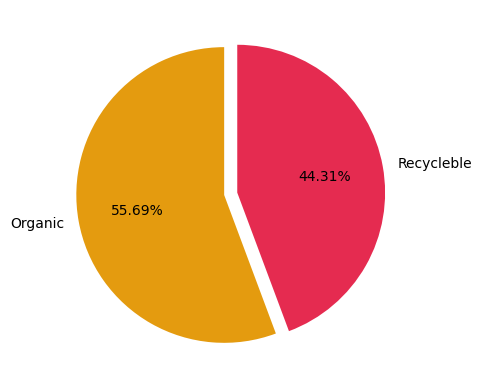

In [11]:
colors = ['#E49B0F' , '#E52B50']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recycleble'],autopct='%0.2f%%', colors=colors, startangle=90, explode = [0.03, 0.06])
plt.show()

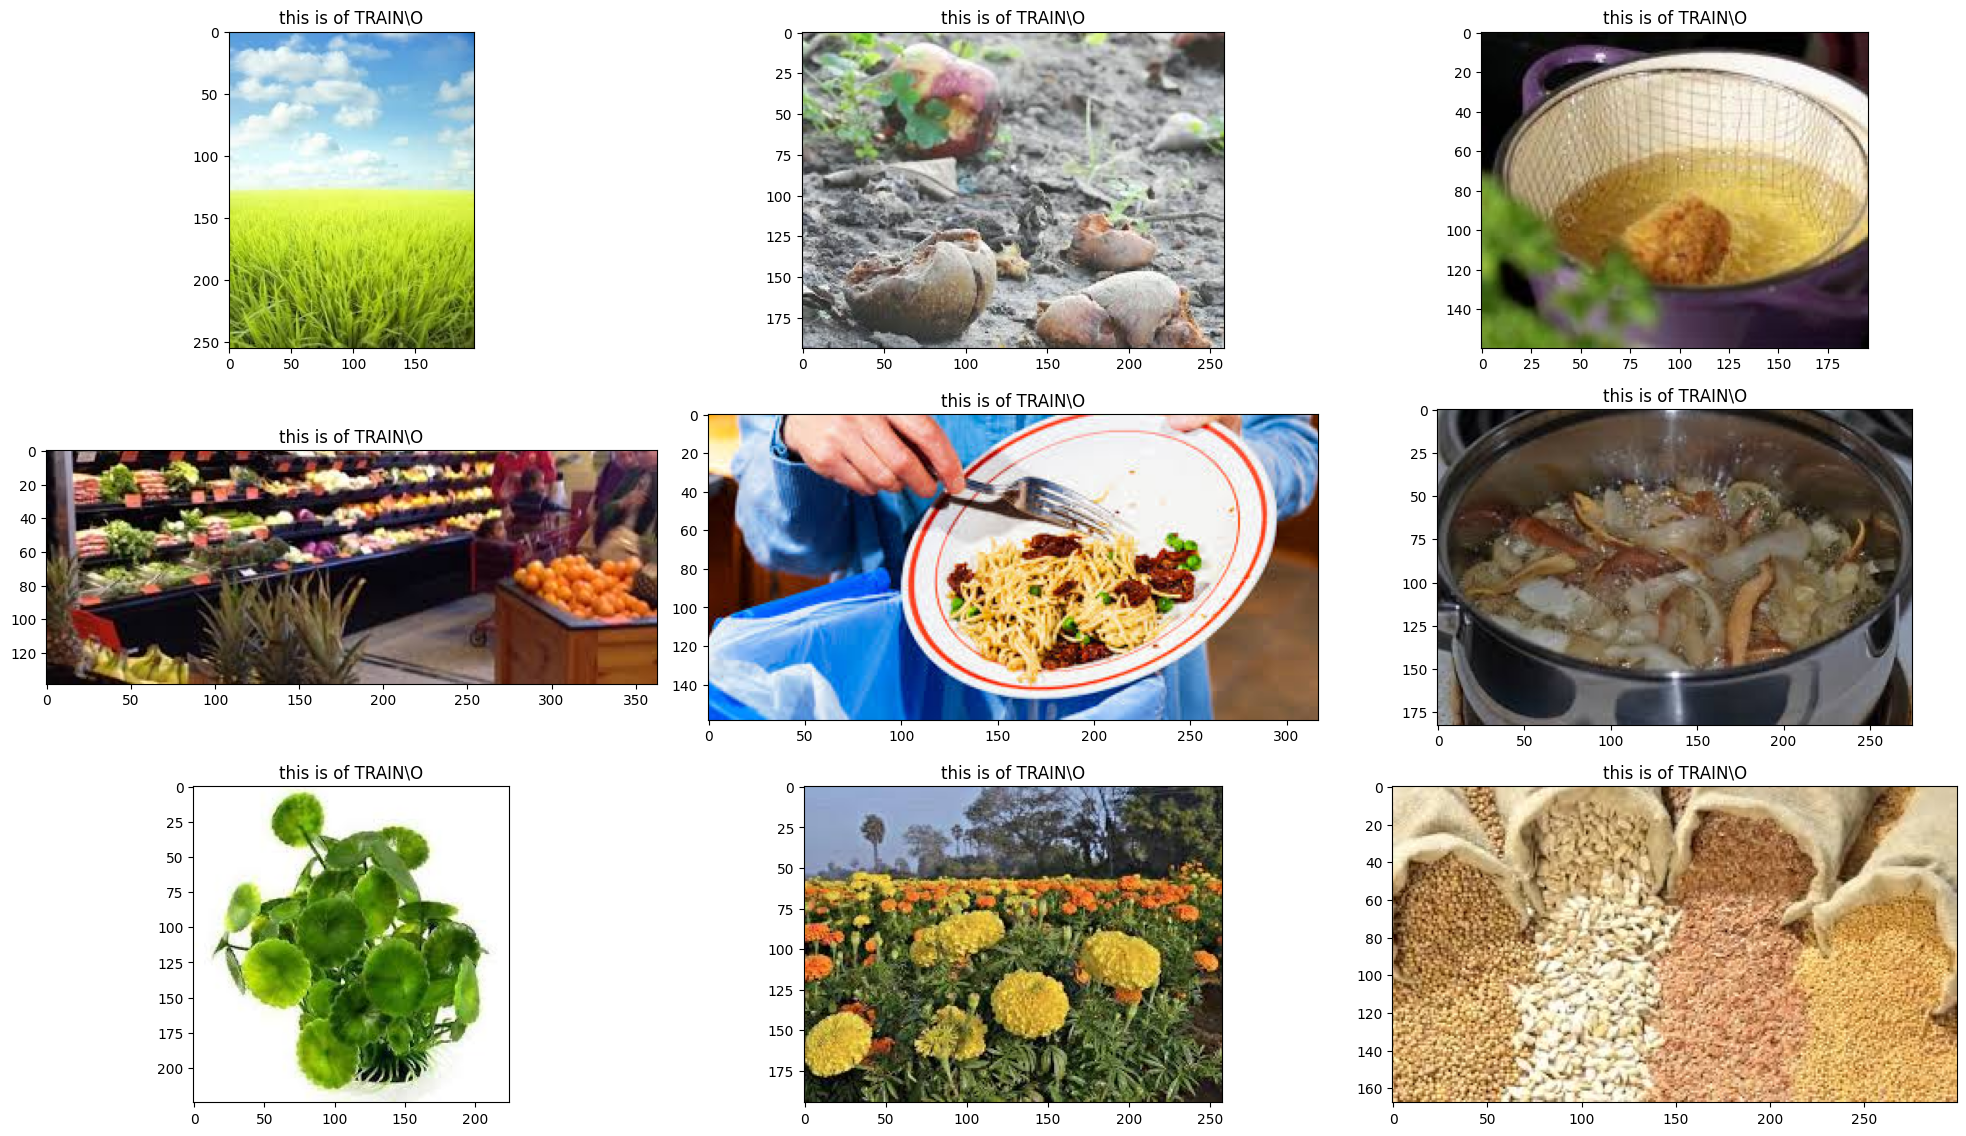

In [37]:
plt.figure(figsize=(20,15))
for i in range (9):
    plt.subplot(4, 3, (i%12)+1)
    index=np.random.randint(12000)
    plt.title('this is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()
              

## CNN - Convolutional Neural Network

In [38]:
model= Sequential()

model.add(Conv2D(32,(3,2), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])
batch_size = 64



In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 223, 32)   │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 222, 223, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,260,962 (84.92 MB)

 Trainable params: 22,260,962 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size= (224,224),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size= (224,224),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [43]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.7667 - loss: 0.5390 - val_accuracy: 0.8743 - val_loss: 0.3288
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.8434 - loss: 0.3849 - val_accuracy: 0.8699 - val_loss: 0.3297
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.8574 - loss: 0.3549 - val_accuracy: 0.8858 - val_loss: 0.2850
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 516s 1s/step - accuracy: 0.8676 - loss: 0.3278 - val_accuracy: 0.8866 - val_loss: 0.3109
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 519s 1s/step - accuracy: 0.8855 - loss: 0.2869 - val_accuracy: 0.8603 - val_loss: 0.3163
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.8975 - loss: 0.2644 - val_accuracy: 0.9025 - val_loss: 0.2842
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.9201 - loss: 0.2073 - val_accuracy: 0.8945 - val_loss: 0.3231
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 502s 1s/step - accuracy: 0.9379 - loss: 0.1669 - val_accu